In [35]:
from qiskit import *

In [36]:
from qiskit.tools.visualization import plot_histogram

In [37]:
from qiskit.tools.monitor import job_monitor

In [38]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-19 16:57:33,921: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [39]:
quantum_register = QuantumRegister(2)

In [40]:
qbit_1 = quantum_register[0]

In [41]:
qbit_2 = quantum_register[1]

In [42]:
classical_register = ClassicalRegister(2)

In [43]:
bit_1 = classical_register[0]

In [44]:
bit_2 = classical_register[1]

In [45]:
circuit = QuantumCircuit(quantum_register, classical_register)

In [46]:
circuit.h(qbit_1)

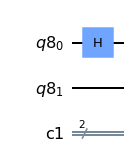

In [47]:
circuit.draw(output='mpl')

In [48]:
circuit.cx(qbit_1, qbit_2)

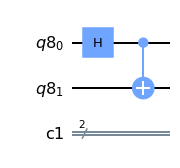

In [49]:
circuit.draw(output='mpl')

In [50]:
from qiskit.quantum_info import Statevector

In [51]:
state = Statevector.from_int(0, 2**2)

In [52]:
state = state.evolve(circuit)

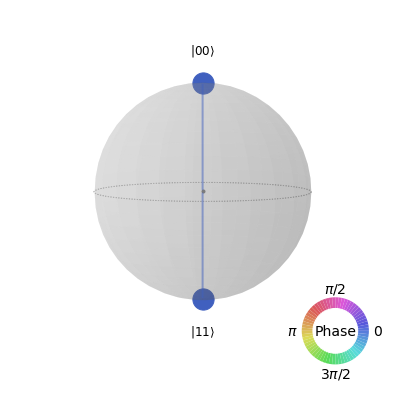

In [53]:
state.draw('qsphere')

In [20]:
circuit.measure(quantum_register, classical_register)

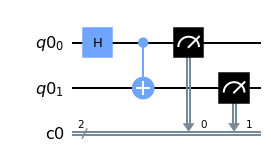

In [21]:
circuit.draw(output='mpl')

In [22]:
simulator = Aer.get_backend('qasm_simulator')

In [23]:
result = execute(circuit, backend = simulator).result()

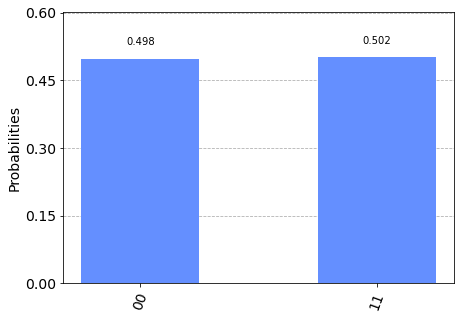

In [24]:
plot_histogram(result.get_counts(circuit))

In [21]:
provider = IBMQ.get_provider('ibm-q')

In [22]:
quantum_computer = provider.get_backend('ibm_oslo')

In [23]:
job = execute(circuit, backend = quantum_computer)

In [27]:
job_monitor(job)

Job Status: job has successfully run


In [28]:
result = job.result()

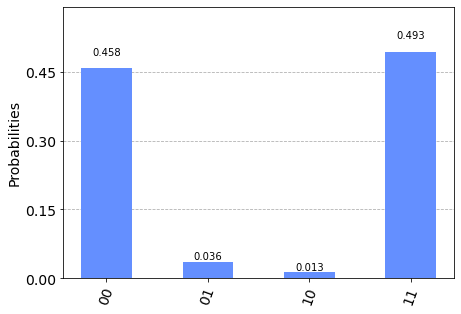

In [29]:
plot_histogram(result.get_counts(circuit))